In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 80
pd.options.display.max_rows = 81

In [2]:
data = pd.read_csv('Train.csv')
data2 = pd.read_csv('Test.csv')

In [3]:
new_data = pd.concat([data,data2]).reset_index(drop=True)
new_data.shape

(80000, 52)

In [4]:
new_data.drop(['Applicant_ID'], axis =1, inplace = True)
data.drop(['Applicant_ID'], axis =1, inplace = True)
data2.drop(['Applicant_ID'], axis =1, inplace = True)


In [5]:
#new_data.drop(['form_field5', 'form_field10', 'form_field17', 
               #'form_field18', 'form_field20', 'form_field22', 
               #'form_field23', 'form_field26', 'form_field27', 
               #'form_field28', 'form_field29', 'form_field32', 
               #'form_field37', 'form_field39', 'form_field46', 'form_field49'], axis =1, inplace = True)
                
## Drop rows with much missing values > 70%
new_data.drop(["form_field40"], axis =1, inplace = True)
new_data.drop(["form_field31"], axis =1, inplace = True)
#new_data.drop(["form_field40","form_field41", 'form_field31','form_field45',"form_field11"], axis =1, inplace = True)


In [6]:
#pd.crosstab(new_data.form_field44, new_data.default_status)
#pd.crosstab(new_data.form_field5, new_data.default_status)

In [7]:
new_data['forma'] = new_data['form_field6'] + new_data['form_field7']+ new_data['form_field8']+ new_data['form_field9']+new_data['form_field12']
    
#new_data.drop(["form_field6","form_field7", 'form_field8','form_field12'], axis =1, inplace = True)

In [8]:
new_data['formb'] = new_data['form_field21'] + new_data['form_field24']+ new_data['form_field25']
#new_data.drop(["form_field21","form_field24", 'form_field25'], axis =1, inplace = True)

In [9]:
new_data['formc'] = new_data['form_field48'] + new_data['form_field50']
new_data.drop(["form_field48", 'form_field50'], axis =1, inplace = True)


new_data['formd'] = new_data['forma'] + new_data['formb'] + new_data['formc']

In [10]:
list1 = ['form_field2','form_field3','form_field4', 'form_field9',
        'form_field13','form_field16','form_field19','form_field34','form_field35',
        'form_field36','form_field38','form_field42']
for col in list1:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(0, inplace = True)


In [11]:
list2 = ['forma','formb','formc','formd','form_field15','form_field33','form_field44']
for col in list2:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(new_data[col].median(), inplace = True)

In [12]:
mcolumns = new_data.columns[new_data.isna().any()]
mcolumns = mcolumns[:-1]


for column in mcolumns:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[column].fillna(-999, inplace = True)

In [13]:
new_data.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field41', 'form_field42',
       'form_field43', 'form_field44', 'form_field45', 'form_field46',
       'form_field47', 'form_field49', 'default_status', 'forma', 'formb',
       'formc', 'formd'],
      dtype='object')

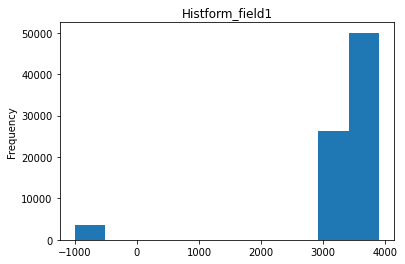

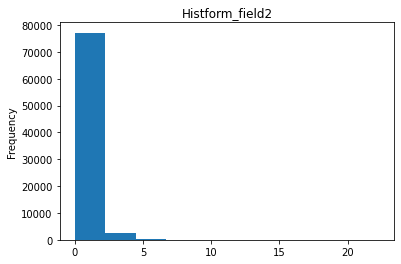

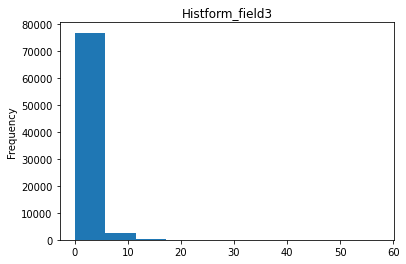

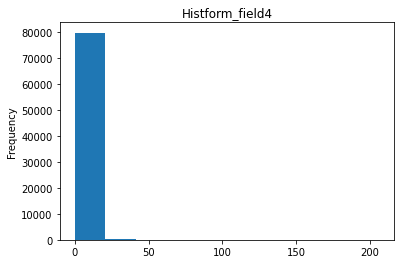

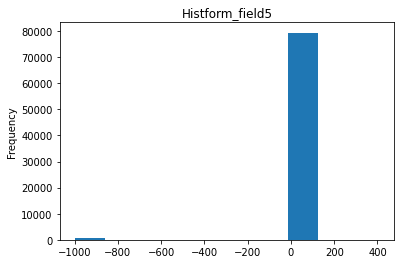

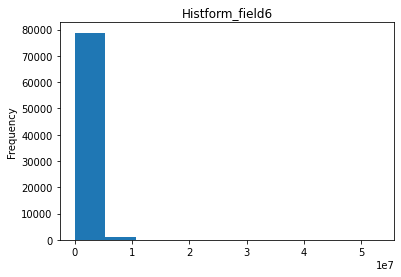

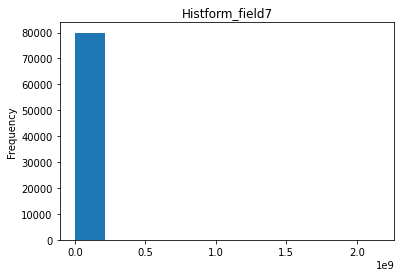

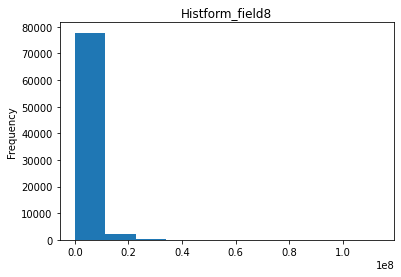

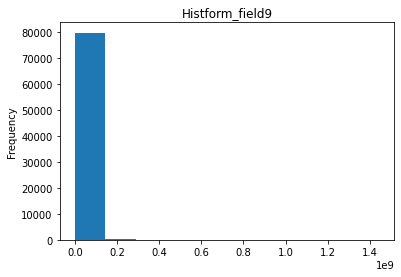

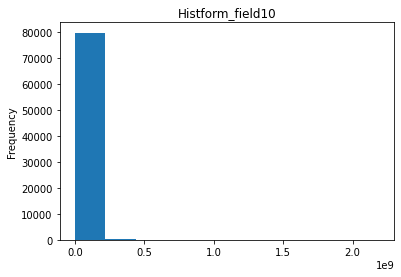

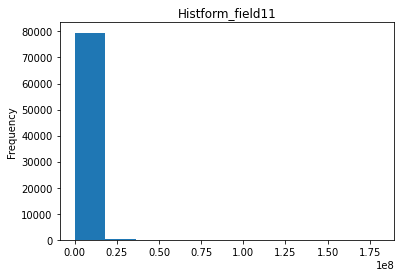

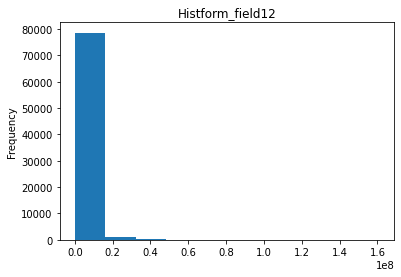

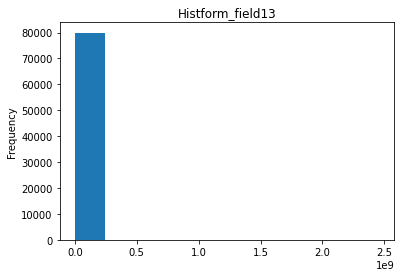

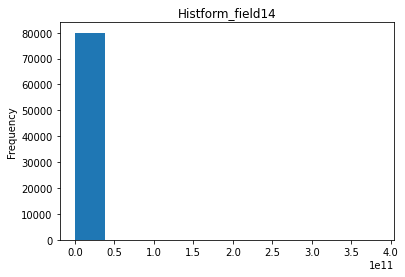

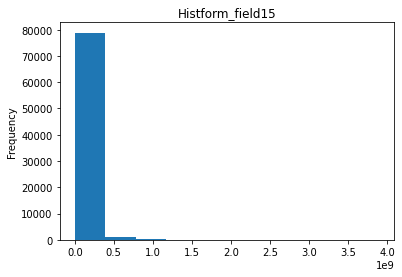

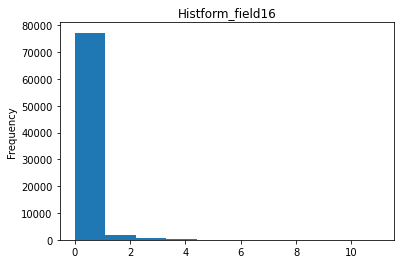

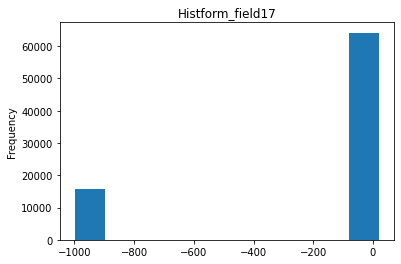

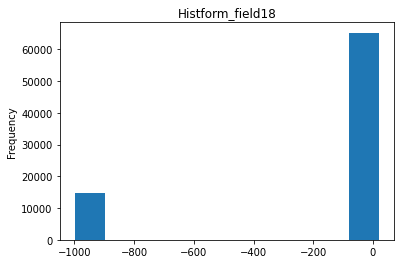

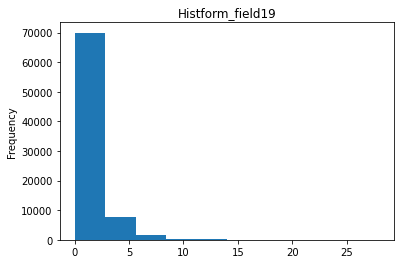

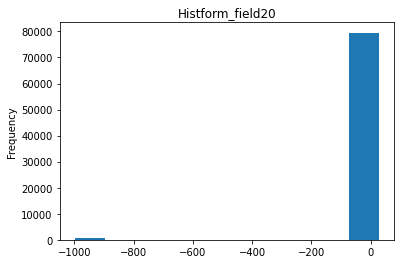

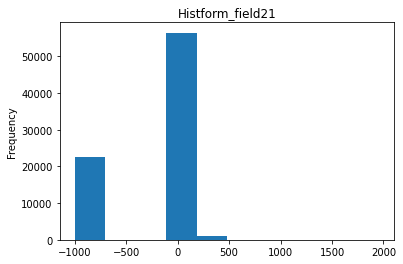

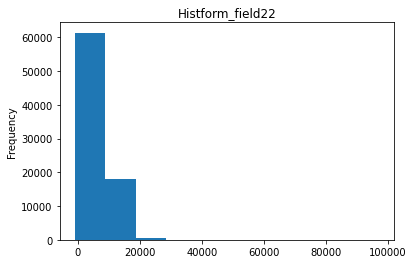

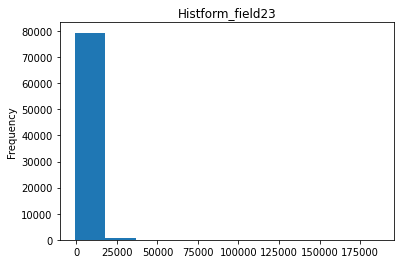

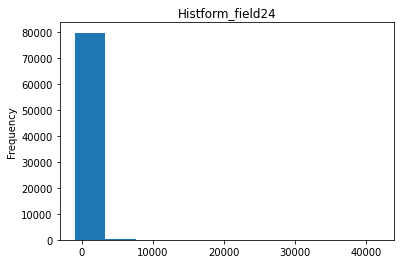

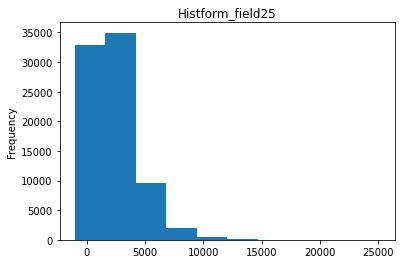

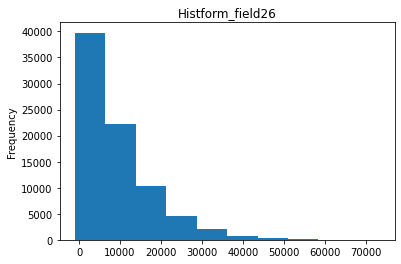

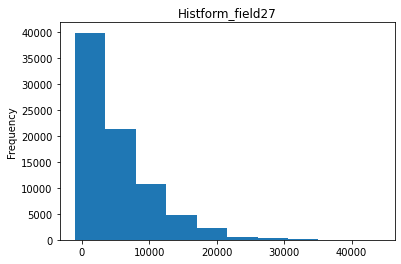

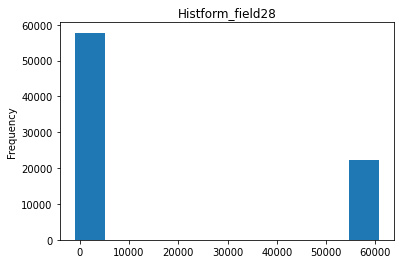

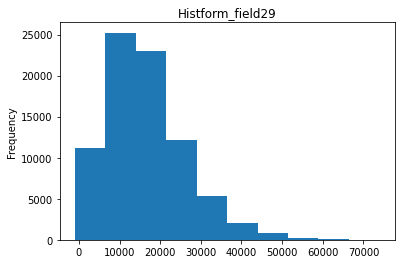

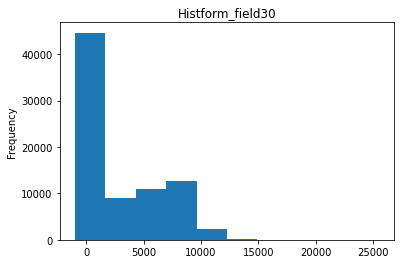

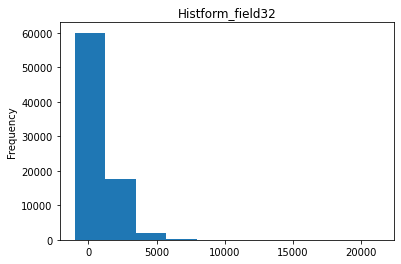

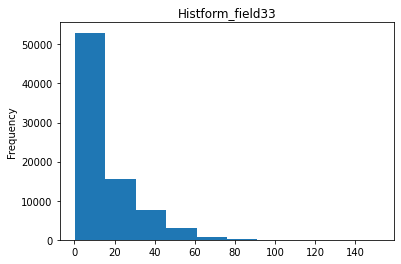

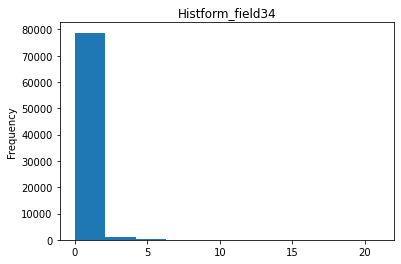

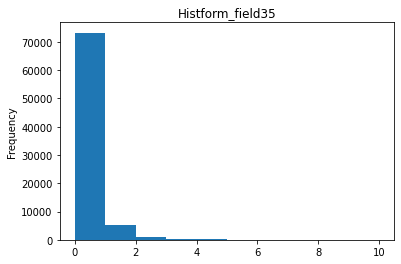

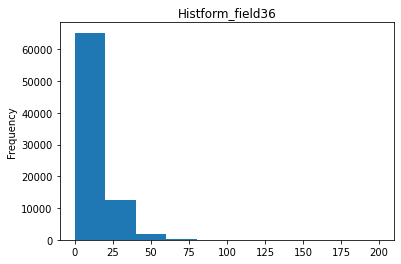

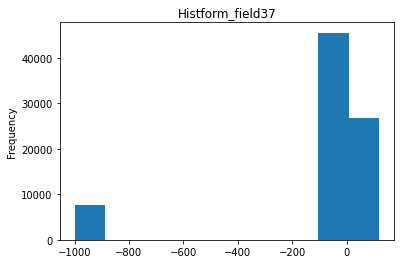

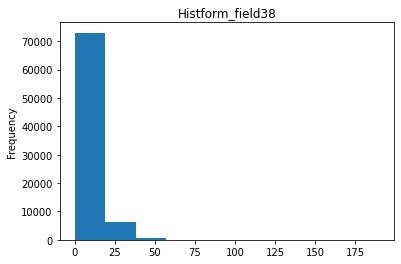

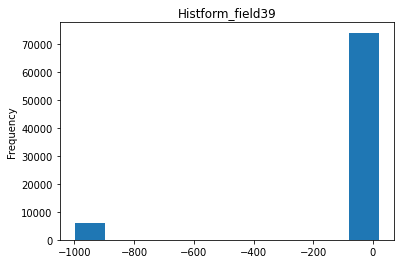

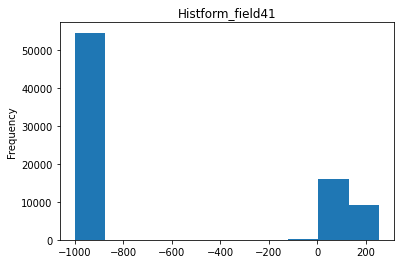

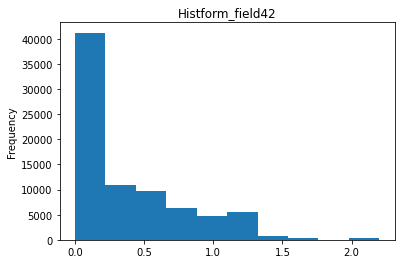

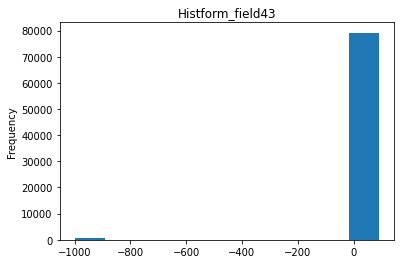

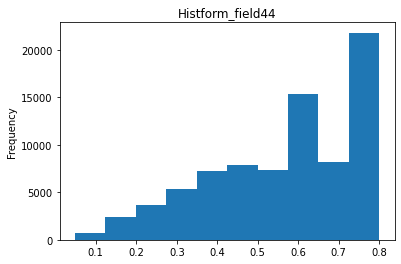

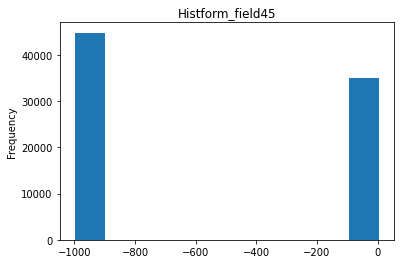

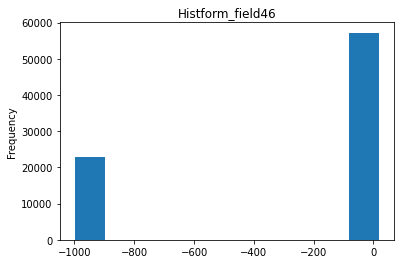

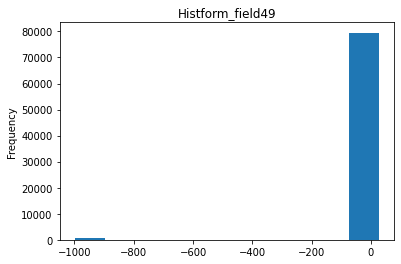

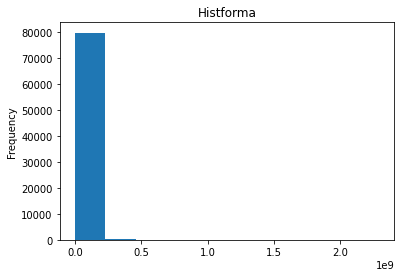

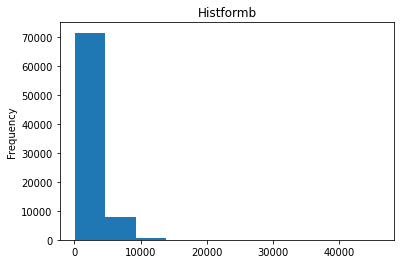

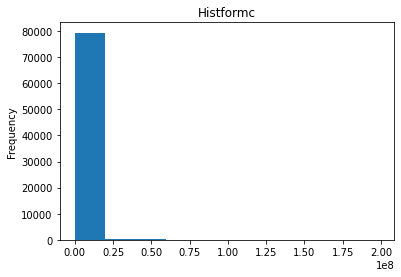

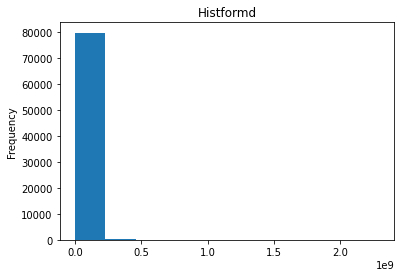

In [14]:
for col in new_data.drop(['form_field47','default_status'], axis =1).columns:
    
    new_data[col].plot(kind='hist', title = 'Hist' + col)
    plt.show()

In [15]:
new_data.form_field47[new_data.form_field47 == 'charge'] = 1
new_data.form_field47[new_data.form_field47 == 'lending'] = 0
new_data.form_field47 = new_data.form_field47.astype(int)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import preprocessing
sc = StandardScaler()
ms = MinMaxScaler()

In [17]:
from sklearn.model_selection import train_test_split
train = new_data[0:56000]
test = new_data[56000:]
train.default_status[train.default_status == 'no'] = 0
train.default_status[train.default_status == 'yes'] = 1
train['default_status'] = train['default_status'].astype(int)

In [18]:
X = train.drop(['default_status'], axis = 1)
y = train['default_status']
#X= preprocessing.scale(X)
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = SelectKBest(chi2, k=18).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [19]:
#test.drop(['default_status'], axis =1 , inplace = True)

In [20]:
#!pip install catboost

In [21]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
## using stratified KFold

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
seed = 2020
parameters = {
              'n_estimators': 4000,
              'learning_rate': 0.009,
              'loss_function': 'CrossEntropy',
              'max_depth': 8,
              #'task_type':'GPU',
              'eval_metric':'AUC',
              'random_seed': seed,
              'early_stopping_rounds': 300,
              'use_best_model': True,
}

In [29]:
fold_score = 0
test_pred = []

n = 8
#kf = StratifiedKFold(n)
kf = StratifiedShuffleSplit(n_splits=8,test_size=0.2)

for train_index, test_index in kf.split(X, y):
    Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    cat_model = CatBoostClassifier(**parameters)
    cat_model.fit(Xtrain, ytrain, eval_set=[(Xtest,ytest)], verbose=200)
    
    pred = cat_model.predict_proba(Xtest)[:, 1]
    score = roc_auc_score(ytest, pred)
    fold_score = fold_score + (score/n)
    print(fold_score)
    
    predictions = cat_model.predict_proba(test)[:, 1]
    test_pred.append(predictions)

0:	test: 0.7971325	best: 0.7971325 (0)	total: 392ms	remaining: 26m 7s
200:	test: 0.8314276	best: 0.8314276 (200)	total: 42.4s	remaining: 13m 21s
400:	test: 0.8353786	best: 0.8353786 (400)	total: 1m 19s	remaining: 11m 57s
600:	test: 0.8376548	best: 0.8376568 (599)	total: 1m 53s	remaining: 10m 44s
800:	test: 0.8389096	best: 0.8389096 (800)	total: 2m 27s	remaining: 9m 48s
1000:	test: 0.8396184	best: 0.8396184 (1000)	total: 3m 2s	remaining: 9m 5s
1200:	test: 0.8401565	best: 0.8401565 (1200)	total: 3m 38s	remaining: 8m 28s
1400:	test: 0.8407008	best: 0.8407115 (1398)	total: 4m 14s	remaining: 7m 52s
1600:	test: 0.8409495	best: 0.8409565 (1595)	total: 4m 50s	remaining: 7m 14s
1800:	test: 0.8410654	best: 0.8411027 (1744)	total: 5m 25s	remaining: 6m 37s
2000:	test: 0.8409977	best: 0.8411028 (1807)	total: 6m 1s	remaining: 6m 1s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8411027526
bestIteration = 1807

Shrink model to first 1808 iterations.
0.10513784407673032
0:	test: 

0.73560158893497
0:	test: 0.8075374	best: 0.8075374 (0)	total: 236ms	remaining: 15m 44s
200:	test: 0.8348448	best: 0.8348448 (200)	total: 35.4s	remaining: 11m 8s
400:	test: 0.8387648	best: 0.8387648 (400)	total: 1m 9s	remaining: 10m 24s
600:	test: 0.8408870	best: 0.8408870 (600)	total: 1m 44s	remaining: 9m 48s
800:	test: 0.8421905	best: 0.8421905 (800)	total: 2m 17s	remaining: 9m 10s
1000:	test: 0.8432098	best: 0.8432098 (1000)	total: 2m 53s	remaining: 8m 40s
1200:	test: 0.8440163	best: 0.8440163 (1200)	total: 3m 28s	remaining: 8m 5s
1400:	test: 0.8447596	best: 0.8447616 (1393)	total: 4m 2s	remaining: 7m 29s
1600:	test: 0.8451847	best: 0.8451883 (1590)	total: 4m 36s	remaining: 6m 54s
1800:	test: 0.8454592	best: 0.8454592 (1800)	total: 5m 10s	remaining: 6m 19s
2000:	test: 0.8456841	best: 0.8456872 (1998)	total: 5m 44s	remaining: 5m 43s
2200:	test: 0.8457359	best: 0.8457658 (2079)	total: 6m 18s	remaining: 5m 9s
2400:	test: 0.8459218	best: 0.8459234 (2399)	total: 6m 52s	remaining: 4m 34s


In [30]:
prediction = pd.DataFrame(test_pred)
prediction.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,23960,23961,23962,23963,23964,23965,23966,23967,23968,23969,23970,23971,23972,23973,23974,23975,23976,23977,23978,23979,23980,23981,23982,23983,23984,23985,23986,23987,23988,23989,23990,23991,23992,23993,23994,23995,23996,23997,23998,23999
0,0.372921,0.396441,0.371848,0.744578,0.160414,0.328547,0.373582,0.565930,0.385529,0.350568,0.107736,0.020793,0.537535,0.040119,0.452260,0.670934,0.309269,0.066502,0.126143,0.750165,0.079158,0.085669,0.057784,0.314444,0.030529,0.040468,0.423891,0.039494,0.144136,0.074949,0.607407,0.335737,0.080632,0.201953,0.309257,0.664504,0.102969,0.113823,0.018033,0.005358,...,0.015429,0.108611,0.113779,0.006232,0.006051,0.318983,0.128988,0.094804,0.019660,0.101967,0.447801,0.329513,0.108592,0.015278,0.138154,0.181802,0.010279,0.066670,0.016346,0.405297,0.049832,0.458477,0.393564,0.571826,0.559463,0.303491,0.424195,0.284595,0.466638,0.036537,0.459599,0.613366,0.852750,0.571896,0.142309,0.726090,0.246306,0.314021,0.525091,0.177703
1,0.298085,0.368263,0.358783,0.776056,0.202239,0.388081,0.397717,0.567089,0.425311,0.314004,0.109310,0.017545,0.584296,0.038964,0.454628,0.641596,0.305588,0.054697,0.127318,0.726688,0.072992,0.076813,0.054252,0.275099,0.026308,0.035337,0.493392,0.036439,0.146899,0.080224,0.620841,0.321483,0.079762,0.196112,0.325113,0.661273,0.101258,0.103513,0.018026,0.005192,...,0.014486,0.106383,0.117240,0.006693,0.006150,0.277481,0.130502,0.104484,0.017130,0.094495,0.437053,0.295461,0.130750,0.012954,0.105029,0.131729,0.011193,0.061468,0.016466,0.391324,0.052698,0.535376,0.400328,0.581505,0.527562,0.349800,0.455470,0.288442,0.466605,0.039119,0.418712,0.590515,0.857107,0.650035,0.134045,0.692761,0.272384,0.315050,0.548586,0.189819
2,0.353567,0.369187,0.381308,0.739589,0.196832,0.342802,0.369086,0.584013,0.435119,0.325549,0.083641,0.019950,0.541571,0.037803,0.501744,0.656227,0.277491,0.063584,0.112356,0.736726,0.059078,0.087082,0.058679,0.209048,0.021187,0.033128,0.497204,0.040271,0.138218,0.082268,0.633951,0.319652,0.069286,0.182500,0.350715,0.695374,0.077593,0.121645,0.016433,0.004546,...,0.016142,0.114275,0.098944,0.005960,0.006177,0.286653,0.134916,0.093228,0.017660,0.106486,0.375846,0.290925,0.120915,0.012536,0.125794,0.169397,0.010198,0.067279,0.015456,0.416969,0.055474,0.547104,0.420761,0.593623,0.505691,0.248701,0.508413,0.367919,0.447311,0.030748,0.451104,0.611826,0.869055,0.621296,0.117591,0.695421,0.242976,0.273956,0.527983,0.149566
3,0.289685,0.446525,0.368098,0.743246,0.194006,0.383502,0.374382,0.575526,0.423887,0.316597,0.090350,0.017722,0.523937,0.038977,0.565784,0.602862,0.321420,0.061345,0.128485,0.755552,0.067016,0.072257,0.055558,0.309735,0.018430,0.040872,0.448198,0.041941,0.149049,0.068578,0.629121,0.331520,0.072695,0.218409,0.307310,0.704760,0.094204,0.124134,0.017315,0.005911,...,0.015381,0.096715,0.117297,0.005865,0.005924,0.336757,0.128250,0.091358,0.016779,0.090829,0.399971,0.260005,0.107996,0.014049,0.128906,0.159237,0.010523,0.070409,0.015051,0.372946,0.049062,0.510139,0.412254,0.543802,0.552254,0.269152,0.558970,0.306498,0.378589,0.034716,0.446722,0.643648,0.865178,0.631049,0.134353,0.742303,0.221173,0.270376,0.528144,0.236169
4,0.332315,0.441853,0.371210,0.768285,0.209948,0.392222,0.382793,0.556117,0.369733,0.306843,0.114857,0.018137,0.584544,0.037699,0.496897,0.614437,0.266400,0.057820,0.135201,0.738470,0.072205,0.079495,0.056456,0.268952,0.022484,0.038267,0.499002,0.037268,0.149921,0.057553,0.597194,0.309164,0.071993,0.198915,0.331536,0.750078,0.110479,0.115467,0.016910,0.005200,...,0.013585,0.108691,0.110710,0.007335,0.005862,0.316396,0.130076,0.103678,0.017426,0.083312,0.369141,0.283194,0.138381,0.013934,0.126630,0.192148,0.009608,0.066972,0.015949,0.379774,0.047634,0.542239,0.392673,0.551707,0.496574,0.317290,0.447840,0.297249,0.348352,0.031893,0.413978,0.584360,0.866607,0.576345,0.122270,0.659696,0.214854,0.268316,0.522375,0.188139
5,0.349051,0.37

In [31]:
dt = pd.read_csv('Test.csv')
output = pd.DataFrame({'Applicant_ID' : dt['Applicant_ID'], "default_status": np.mean(prediction, axis = 0)})

In [32]:
output.head(50)

,Applicant_ID,default_status
0,Apcnt_1000032,0.325370
1,Apcnt_1000048,0.401808
2,Apcnt_1000052,0.377606
3,Apcnt_1000076,0.755949
4,Apcnt_1000080,0.189180
5,Apcnt_1000084,0.364187
6,Apcnt_1000104,0.379692
7,Apcnt_1000116,0.573642
8,Apcnt_1000128,0.418849
9,Apcnt_1000156,0.314021


In [66]:
output.head(50)

,Applicant_ID,default_status
0,Apcnt_1000032,0.329019
1,Apcnt_1000048,0.411260
2,Apcnt_1000052,0.349365
3,Apcnt_1000076,0.745906
4,Apcnt_1000080,0.182204
5,Apcnt_1000084,0.356096
6,Apcnt_1000104,0.367451
7,Apcnt_1000116,0.578959
8,Apcnt_1000128,0.414560
9,Apcnt_1000156,0.319750


In [63]:
output.to_csv('Finally3.csv', index= False)

In [ ]:
## Averaging/Weighted Averaging of best submissions

In [ ]:
dat1 = pd.read_csv('S1.csv')
dat2 = pd.read_csv('S2.csv')
dat3 = pd.read_csv('S4.csv')
dat4 = pd.read_csv('S3.csv')


dat5 = pd.read_csv('10C_MODELcrossVal.csv')
dat6 = pd.read_csv('Final5.csv')

dat6 = pd.read_csv('Finalllo.csv')
dat7 = pd.read_csv('Finalllimm.csv')
dat8 = pd.read_csv('Finalllii.csv')
dat9 = pd.read_csv('FL.csv')
dat10 = pd.read_csv('FL2.csv')

In [ ]:
datt = (dat2['default_status'] + dat6['default_status']+dat7['default_status'] + dat8['default_status']+dat9['default_status']+dat10['default_status'])/6
#datt = (dat1['default_status'] + dat2['default_status'] + dat3['default_status'])/3
#datt = 0.4*(dat2['default_status']) + 0.3*(dat3['default_status']) + 0.3*(dat1['default_status'])

In [ ]:
df = pd.read_csv('SampleSubmission.csv')
df['default_status'] = datt
df.to_csv('FL3.csv', index = False)

In [ ]:
df.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.314835
1,Apcnt_1000048,0.392888
2,Apcnt_1000052,0.375079
3,Apcnt_1000076,0.744925
4,Apcnt_1000080,0.157771
